In [ ]:
# 문제 : https://www.datamanim.com/dataset/ADPpb/00/26.html
# 풀이 : https://amaruak00.github.io/2022/09/26/adp26th.html

In [ ]:
##데이터 확인 및 전처리
# 1.1 결측치를 확인하고, 결측치 제거할 것
# 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것
# 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

In [1]:
# 데이터 블러오기
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


In [2]:
# 1.1 결측치를 확인하고, 결측치 제거할 것
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [3]:
df.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [4]:
# KNN으로 결측치 대체
fill_columns = ['Quantity', 'UnitPrice']
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_knnim = imputer.fit_transform(df[fill_columns])
df[fill_columns] = df_knnim
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
# 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것
df.describe()

,Quantity,UnitPrice,CustomerID
count,35801.000000,35801.000000,35801.000000
mean,18.424536,4.617197,13221.824390
std,42.151098,48.054142,1012.177727
min,-480.000000,0.000000,12354.000000
25%,4.000000,1.250000,12523.000000
50%,10.000000,1.950000,12681.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17097.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x17892098ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x17892098e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x17892098748>],
 'medians': [<matplotlib.lines.Line2D at 0x178920b4948>],
 'fliers': [<matplotlib.lines.Line2D at 0x178920ad908>],
 'means': []}

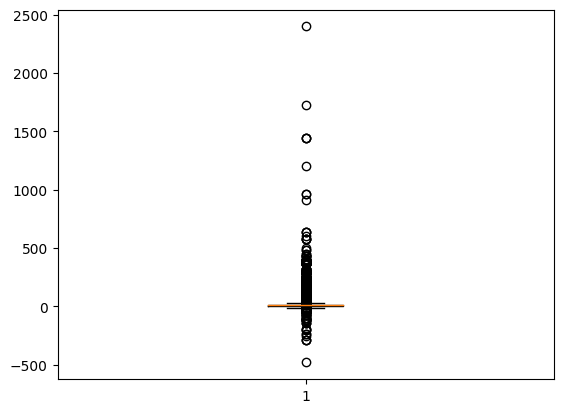

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df['Quantity'], whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x178920fd908>,
 'caps': [<matplotlib.lines.Line2D at 0x17892102148>,
 'boxes': [<matplotlib.lines.Line2D at 0x178920fd048>],
 'medians': [<matplotlib.lines.Line2D at 0x1789210a308>],
 'fliers': [<matplotlib.lines.Line2D at 0x17892102d48>],
 'means': []}

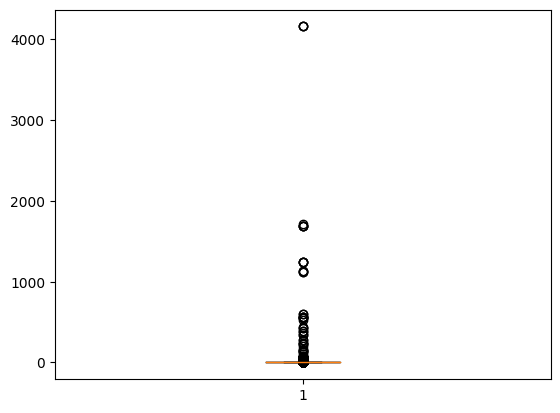

In [7]:
plt.boxplot(df['UnitPrice'], whis=1.5)

In [8]:
import numpy as np
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(df, 'UnitPrice')
outliers

,UnitPrice
8,15.95
13,18.00
15,7.95
29,15.00
35,65.00
...,...
35773,18.00
35774,18.00
35786,1241.98
35794,18.00


In [9]:
# KNN 기법을 활용하여 이상치를 대체한다.
df.loc[outliers.index, 'UnitPrice'] = np.NaN
df.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice      4339
CustomerID        0
Country           0
dtype: int64

In [10]:
# NaN 된 이상치를 knn으로 이상치 대체
fill_columns = ['UnitPrice']
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_knnim = imputer.fit_transform(df[fill_columns])
df[fill_columns] = df_knnim
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
outliers = outliers_iqr(df, 'Quantity')
outliers

,Quantity
7,48.0
20,288.0
24,120.0
25,144.0
30,60.0
...,...
35753,48.0
35769,288.0
35777,36.0
35783,160.0


In [12]:
# KNN 기법을 활용하여 이상치를 대체한다.
df.loc[outliers.index, 'Quantity'] = np.NaN
df.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity       3737
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [13]:
# NaN 된 이상치를 knn으로 이상치 대체
fill_columns = ['Quantity']
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_knnim = imputer.fit_transform(df[fill_columns])
df[fill_columns] = df_knnim
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,35801.000000,35801.000000,35801.000000
mean,9.673515,2.102768,13221.824390
std,6.853698,1.397092,1012.177727
min,-14.000000,0.000000,12354.000000
25%,4.000000,1.250000,12523.000000
50%,9.673515,1.950000,12681.000000
75%,12.000000,2.550000,14156.000000
max,34.000000,7.500000,17097.000000


In [ ]:
## 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것
# KNN : K개의 주변클래스 중 가장 많은 클래스로 특정 자료를 분류하는 방식
#  주로 주변클래스는 가장 가까운 자료를 이용하여 클래스 할당함
#  데이터 자체를 따로 학습할 필요가 없다 (자체가 데이터이다.)
# 장점 : 구현이 쉽다 / 알고리즘을 이해하기 쉽다 / 하이퍼파라미터가 적다
# 단점 : 예측 속도가 느리다 / 메모리를 많이 쓴다 / 노이즈 데이터에 예민하다

# DB스캔(밀도기반군집화) : 밀도를 기반으로 클래스를 군집화하는 방식
# 장점 : 군집의 개수를 선정하지 않아도 됨
#  노이즈를 구분하여 버림으로 의미없는 군집 생성을 차단함 (이상치를 구분해내기 위해서 활용하기도 함)
#  복잡하거나 기하학적인 형태를 가진 데이터에도 적용 가능
# 단점 : 고차원에서 밀도가 높은 지역을 찾는 것이 어려울 수도 있다는 점
#  데이터의 밀도가 다양한 데이터에 적합하지 않음. 

In [15]:
df = df.drop('InvoiceNo', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StockCode    35801 non-null  object 
 1   Description  35801 non-null  object 
 2   Quantity     35801 non-null  float64
 3   InvoiceDate  35801 non-null  object 
 4   UnitPrice    35801 non-null  float64
 5   CustomerID   35801 non-null  float64
 6   Country      35801 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.9+ MB


In [16]:
import pandas as pd
df02 = pd.get_dummies(df, columns=['StockCode', 'Description', 'InvoiceDate', 'Country'])
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Columns: 7269 entries, Quantity to Country_Switzerland
dtypes: float64(3), uint8(7266)
memory usage: 248.9 MB


In [ ]:
# 추천 시스템은 나중에 하자
# 2.1 위에서 생성한 군집들의 특성을 분석할 것
# 2.2 각 군집 별 대표 추천 상품을 도출할 것
# 2.3 CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [ ]:
## 군집분석
# 2.1 위에서 생성한 군집들의 특성을 분석할 것
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=2023).fit(df02)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(df02, labels))

389219.5236680225
371933.56395977264
683930.2737817748
867745.6827402152
1168236.290727463
1893535.4888776445
2509418.2095941706
3051974.0941679007


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


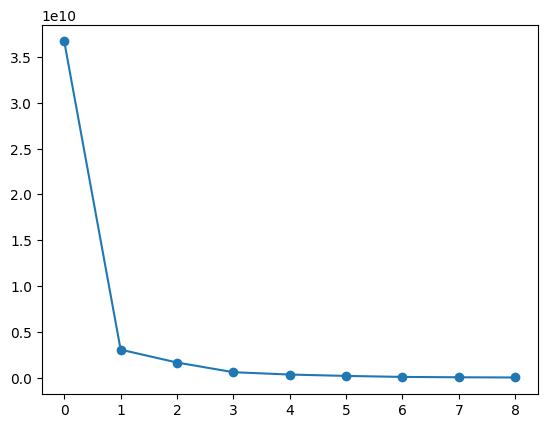

[36679122103.90838, 3089455680.344513, 1684106632.522393, 628956789.5196184, 374407955.43771267, 223402150.07953963, 115196253.21585013, 74586789.39451858, 53690554.276388586]


In [33]:
import matplotlib.pyplot as plt
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=2023)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(sse, marker='o')
    plt.show()
    print(sse)

elbow(df02)

In [18]:
# 최적의 k로 Kmeans 군집화 실행
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=2023)
km.fit(df02)

# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
df02['cluster'] = new_labels

df02.groupby(['cluster']).mean()

,Quantity,UnitPrice,CustomerID,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,...,InvoiceDate_9/9/2011 8:48,InvoiceDate_9/9/2011 9:13,Country_Belgium,Country_EIRE,Country_France,Country_Germany,Country_Netherlands,Country_Portugal,Country_Spain,Country_Switzerland
cluster,,,,,,,,,,,,,,,,,,,,,
0,9.787596,2.069057,12596.862331,0.000435,0.00004,0.000514,0.000079,0.000079,0.000198,0.000079,...,0.000633,0.00178,0.08185,0.000000,0.326885,0.355368,0.011314,0.058549,0.091779,0.074254
1,9.399474,2.183749,14723.087428,0.000095,0.00000,0.000000,0.000190,0.000095,0.000285,0.000000,...,0.000000,0.00000,0.00000,0.711299,0.021667,0.048655,0.198137,0.000000,0.020241,0.000000


In [19]:
df02['cluster'].value_counts()

0    25278
1    10523
Name: cluster, dtype: int64

In [ ]:
# cluster1은 25278건으로 전체의 70%를 차지하고 Country가 Belgium, Portugal, Switzerland면 모두 cluster1임
# cluster2은 10523건으로 전체의 30%를 차지하고 Country가 EIRE면 모두 cluster1임

In [29]:
# 2.2 각 군집 별 대표 추천 상품을 도출할 것
df03 = df02.groupby(['cluster']).mean()

In [53]:
df04 = df03.iloc[:, 2700:5400]

In [57]:
df05 = df04.T

In [67]:
df05[df05[0] > 0.01]
# cluster 1 Description_POSTAGE 추천

cluster,0,1
Description_POSTAGE,0.036395,0.003421


In [70]:
df05[df05[1] > 0.005]
# cluster 2 Description_CARRIAGE 추천

cluster,0,1
Description_CARRIAGE,0.000079,0.009408
Description_REGENCY CAKESTAND 3 TIER,0.007675,0.007412
Description_ROSES REGENCY TEACUP AND SAUCER,0.001385,0.005132


In [ ]:
# 2.3 CustomerID가 12413인 고객을 대상으로 상품을 추천할 것
df[df['CustomerID'] == 12413]

In [78]:
df02[df02['CustomerID'] == 12413]['cluster']

91       0
567      0
749      0
1683     0
2349     0
3749     0
4000     0
4613     0
4654     0
4965     0
5075     0
9891     0
10439    0
11719    0
11874    0
12544    0
13209    0
13317    0
14179    0
14332    0
14364    0
15529    0
18212    0
19659    0
20991    0
21365    0
22014    0
22043    0
22174    0
24252    0
24959    0
29948    0
30228    0
31239    0
31846    0
32338    0
33567    0
34382    0
35069    0
35156    0
Name: cluster, dtype: int32